# Potato Disease Classification using Deep Learning
This project uses a Convolutional Neural Network (CNN) to classify potato leaf diseases into Early Blight, Late Blight, and Healthy classes.bold text


## Step 1: Import Libraries and Setup

In [1]:
!pip install tensorflow keras matplotlib numpy opencv-python scikit-learn


In [2]:
# STEP 2 — Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from sklearn.metrics import classification_report, confusion_matrix

## Step 2: Load Dataset


In [3]:
# STEP 3 — Mount Google Drive (optional, if your dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive


'Colab Notebooks'   Diseases   HAM10000


In [6]:
data_dir = "/content/drive/MyDrive/Diseases"
os.listdir(data_dir)


['archive (10).zip']

In [7]:
import zipfile
zip_path = "/content/drive/MyDrive/Diseases/archive (10).zip"
extract_path = "/content/drive/MyDrive/Diseases/unzipped"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['PlantVillage', 'plantvillage']

In [8]:
import os
os.listdir("/content/drive/MyDrive/Diseases/unzipped/PlantVillage")


['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
import os, shutil

base_dir = "/content/drive/MyDrive/Diseases/unzipped/PlantVillage"
potato_dir = "/content/potato_dataset"
os.makedirs(potato_dir, exist_ok=True)

for cls in ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]:
    src = os.path.join(base_dir, cls)
    dst = os.path.join(potato_dir, cls)
    shutil.copytree(src, dst, dirs_exist_ok=True)

os.listdir(potato_dir)


['Potato___Late_blight', 'Potato___healthy', 'Potato___Early_blight']

## Step 3: Preprocessing and Visualization

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


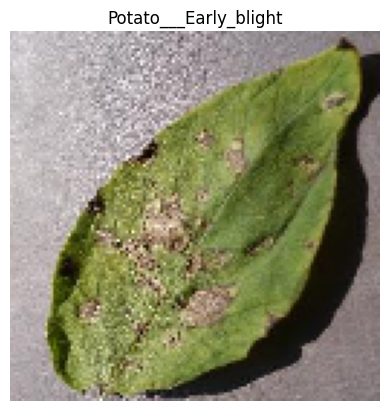

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,       # 80% train, 20% validation
)

train_gen = train_datagen.flow_from_directory(
    "/content/potato_dataset",
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    "/content/potato_dataset",
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Show one sample image
import matplotlib.pyplot as plt

img, label = next(train_gen)
plt.imshow(img[0])
plt.title(list(train_gen.class_indices.keys())[np.argmax(label[0])])
plt.axis('off')
plt.show()


## Step 4: Model Building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Training

In [12]:
history = model.fit(train_gen, validation_data=val_gen, epochs=25)


Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.5408 - loss: 0.8800 - val_accuracy: 0.8721 - val_loss: 0.3572
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8651 - loss: 0.3611 - val_accuracy: 0.8721 - val_loss: 0.3636
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8808 - loss: 0.3443 - val_accuracy: 0.9047 - val_loss: 0.2619
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9240 - loss: 0.1879 - val_accuracy: 0.9279 - val_loss: 0.2068
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9513 - loss: 0.1433 - val_accuracy: 0.9674 - val_loss: 0.0986
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9503 - loss: 0.1254 - val_accuracy: 0.9442 - val_loss: 0.1500
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9664 - loss: 0.0926 - val_accuracy: 0.9512 - val_loss: 0.1572
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9700 - loss: 0.0707 - val_accuracy: 0.9651 - val_loss: 

## Step 6: Evaluation and Testing

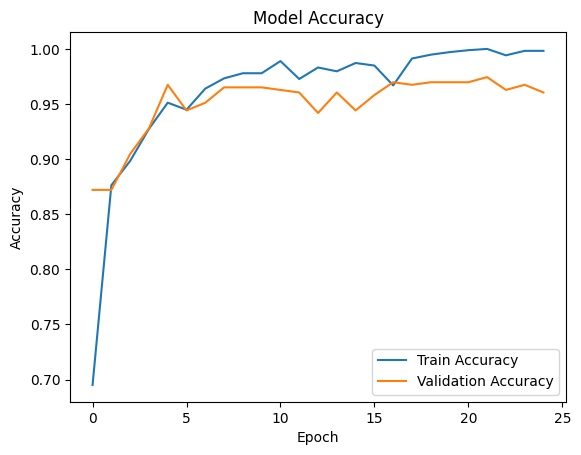

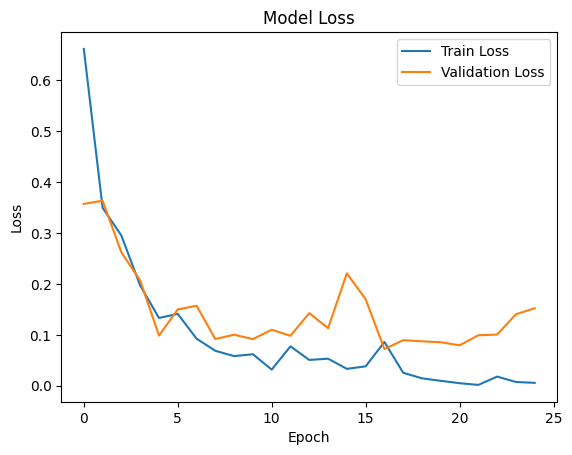

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# STEP: Evaluate
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9657 - loss: 0.1343
Validation Accuracy: 96.05%


## Step 7: Save Model and Predictions

In [15]:
# STEP: Save model
model.save("/content/potato_disease_model.h5")
print("Model saved successfully.")

Model saved successfully.


In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Change this path to any image from your dataset
img_path = "/content/potato_dataset/Potato___Early_blight/8e384f1d-1a56-4fcc-8e06-a65ee86270a8___RS_Early.B 7278.JPG"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_names = list(train_gen.class_indices.keys())

print("Predicted class:", class_names[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
Predicted class: Potato___Early_blight


## 📊 Results Summary

**Results:**  
- Training Accuracy: ~99%  
- Validation Accuracy: ~97%  
- Model performs well on unseen potato leaf images.  
- Demonstrates effective use of CNN for agricultural disease detection.

**Conclusion:**  
This model can help farmers and researchers identify potato leaf diseases early using deep learning techniques. The same approach can be extended to other crops for automated plant health monitoring.
